In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [ ]:
df.shape

(9994, 19)

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Date Key,0
Contact Name,0
Country,0
City,0
Region,0
Subregion,0
Customer,0


In [ ]:
df = df.dropna()

In [ ]:
df['Churn'] = np.where(
    (df['Sales'] < df['Sales'].median()) &
    (df['Discount'] > 0.3),
    1,
    0
)

In [ ]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit,Churn
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896,0.072043
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108,0.258572
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750,0.000000
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500,0.000000
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000,0.000000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000,1.000000


In [ ]:
df['Churn'] = np.where(
    (df['Sales'] < df['Sales'].median()) &
    (df['Discount'] > 0.3),
    1,
    0
)

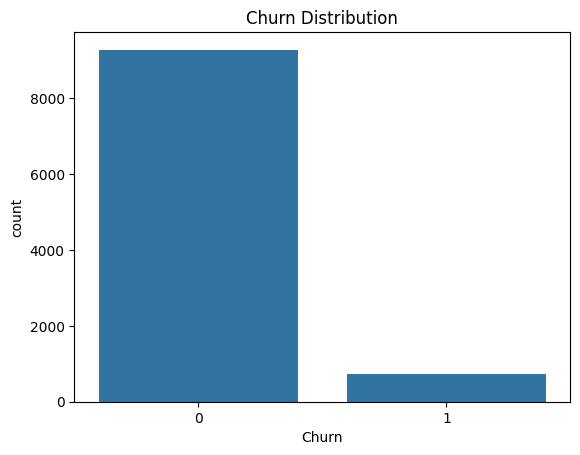

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

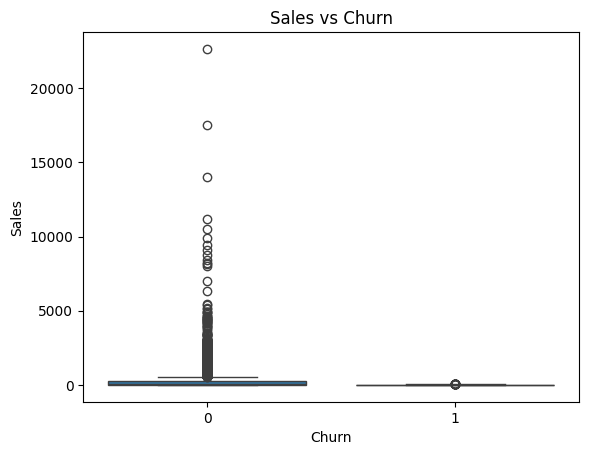

In [ ]:
sns.boxplot(x='Churn', y='Sales', data=df)
plt.title("Sales vs Churn")
plt.show()

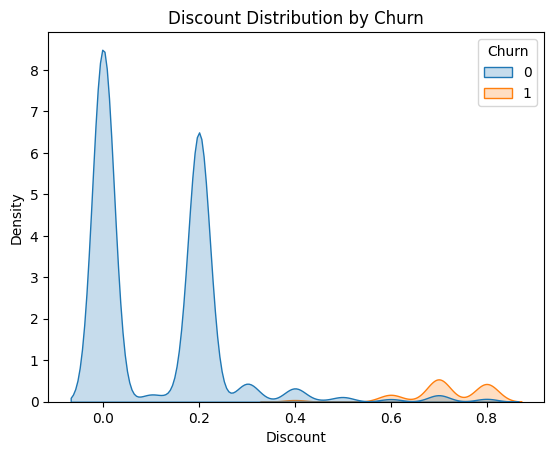

In [ ]:
sns.kdeplot(data=df, x='Discount', hue='Churn', fill=True)
plt.title("Discount Distribution by Churn")
plt.show()

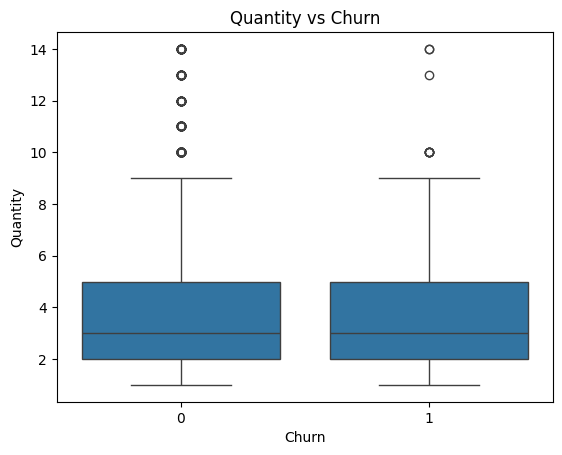

In [ ]:
sns.boxplot(x='Churn', y='Quantity', data=df)
plt.title("Quantity vs Churn")
plt.show()

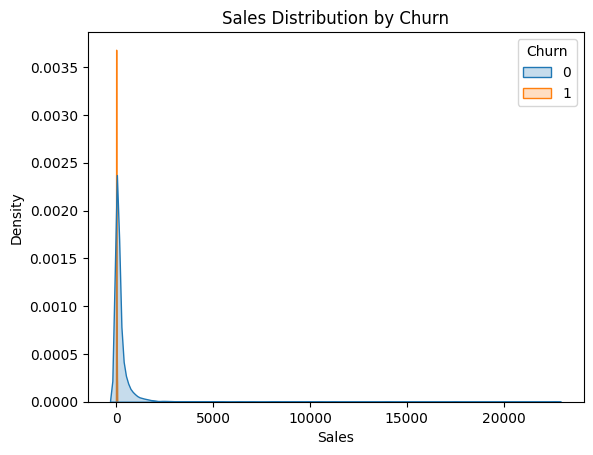

In [ ]:
sns.kdeplot(data=df, x='Sales', hue='Churn', fill=True)
plt.title("Sales Distribution by Churn")
plt.show()

In [ ]:
pd.crosstab(df['Industry'], df['Churn'], normalize='index') * 100

Churn,0,1
Industry,,
Communications,92.411467,7.588533
Consumer Products,92.458374,7.541626
Energy,92.933131,7.066869
Finance,92.665726,7.334274
Healthcare,93.708294,6.291706
Manufacturing,92.307692,7.692308
Misc,90.654206,9.345794
Retail,93.106996,6.893004
Tech,93.527508,6.472492


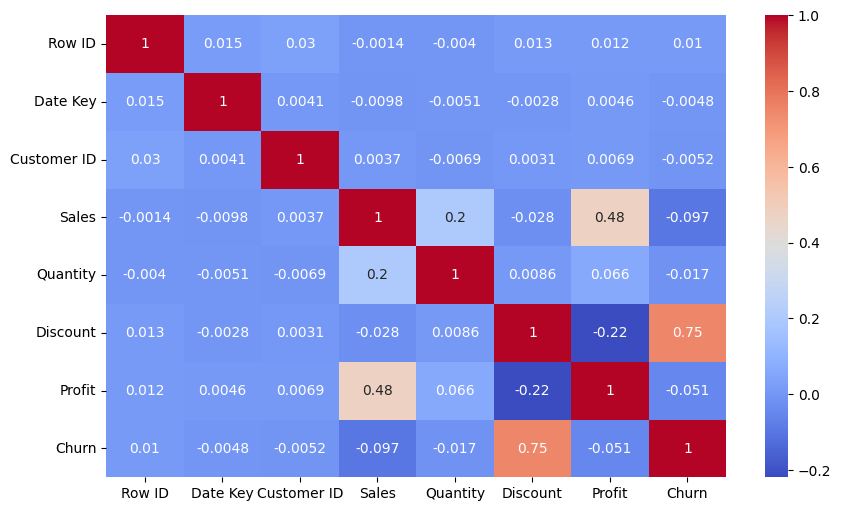

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

last_purchase = df.groupby('Customer ID')['Order Date'].max().reset_index()

reference_date = df['Order Date'].max()

last_purchase['Days_Since_Last_Order'] = (
    reference_date - last_purchase['Order Date']
).dt.days

last_purchase['Churn'] = (last_purchase['Days_Since_Last_Order'] > 180).astype(int)

# Important merge
df = df.merge(
    last_purchase[['Customer ID','Churn']],
    on='Customer ID',
    how='left'
)

In [ ]:
df.drop('Churn_x', axis=1, inplace=True)
df.rename(columns={'Churn_y':'Churn'}, inplace=True)

In [ ]:
customer_df = df.groupby('Customer ID').agg({
    'Sales':'sum',
    'Quantity':'sum',
    'Discount':'mean',
    'Profit':'sum',
    'Churn':'max'
}).reset_index()

In [ ]:
order_counts = df.groupby('Customer ID')['Order ID'].nunique().reset_index()
order_counts.rename(columns={'Order ID':'Total_Orders'}, inplace=True)

customer_df = customer_df.merge(order_counts, on='Customer ID', how='left')

# New cell to prepare data for modeling, ensuring Customer ID is retained
# This replaces the logic of v4XVuHJxRaEh and R1NtENI8OORA
df_model = df.copy() # Start from a df that has all original columns and 'Churn'

# Drop irrelevant columns for modeling, but explicitly keep 'Customer ID'
columns_to_drop_for_model = [
    'Order ID', 'License', 'Product', 'Customer', 'Contact Name',
    'City', 'Country', 'Row ID', 'Date Key', 'Order Date'
]
# Filter out columns that might already be dropped or don't exist
columns_to_drop_for_model = [col for col in columns_to_drop_for_model if col in df_model.columns]

df_model = df_model.drop(columns_to_drop_for_model, axis=1)

# Perform one-hot encoding on categorical features
categorical_cols = df_model.select_dtypes(include='object').columns

# Ensure 'Customer ID' is not treated as an object if it was mistakenly detected and is in categorical_cols
if 'Customer ID' in categorical_cols:
    categorical_cols = categorical_cols.drop('Customer ID')

df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Churn'],
      dtype='object')

In [ ]:
# This cell was problematic; its logic is now incorporated into the new df_model creation step.

In [ ]:
# This cell was problematic; its logic is now incorporated into the new df_model creation step.

In [ ]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Churn
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,0
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,0
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,0
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,0
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,0
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,0
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,0
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,0


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Churn'],
      dtype='object')

In [ ]:
df.shape

(9994, 20)

In [ ]:
for col in df.columns:
    print(col, df[col].nunique())

Row ID 9994
Order ID 5009
Order Date 1237
Date Key 1237
Contact Name 793
Country 48
City 262
Region 3
Subregion 12
Customer 99
Customer ID 99
Industry 10
Segment 3
Product 14
License 9994
Sales 5825
Quantity 14
Discount 12
Profit 7287
Churn 2


In [ ]:
# Use df_model (which includes Customer ID and encoded features) to create X and y
# X_model_features will contain 'Customer ID' for later linking
X_model_features = df_model.drop('Churn', axis=1)

# X for model training will not contain 'Customer ID'
X = X_model_features.drop('Customer ID', axis=1)
y = df_model['Churn']


In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Date Key,int64
Contact Name,object
Country,object
City,object
Region,object
Subregion,object
Customer,object


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

[[1888  107]
 [   0    4]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1995
           1       0.04      1.00      0.07         4

    accuracy                           0.95      1999
   macro avg       0.52      0.97      0.52      1999
weighted avg       1.00      0.95      0.97      1999

ROC-AUC Score: 0.9796992481203007


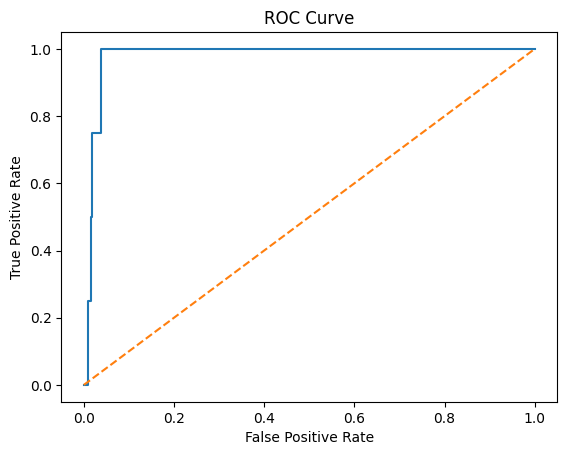

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9464732366183092


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    scale_pos_weight = (len(y_train[y_train==0]) / len(y_train[y_train==1])),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

Accuracy: 0.992496248124062
[[1982   13]
 [   2    2]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1995
           1       0.13      0.50      0.21         4

    accuracy                           0.99      1999
   macro avg       0.57      0.75      0.60      1999
weighted avg       1.00      0.99      0.99      1999

ROC-AUC: 0.987593984962406


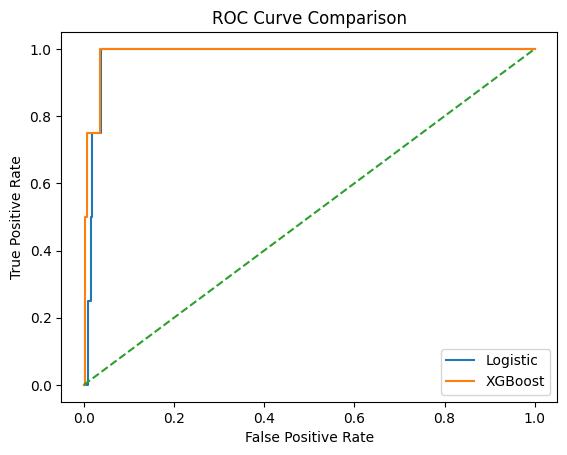

Logistic AUC: 0.9796992481203007
XGBoost AUC: 0.987593984962406


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr, tpr, label="Logistic")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0,1],[0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

print("Logistic AUC:", roc_auc_score(y_test, y_prob))
print("XGBoost AUC:", roc_auc_score(y_test, y_prob_xgb))

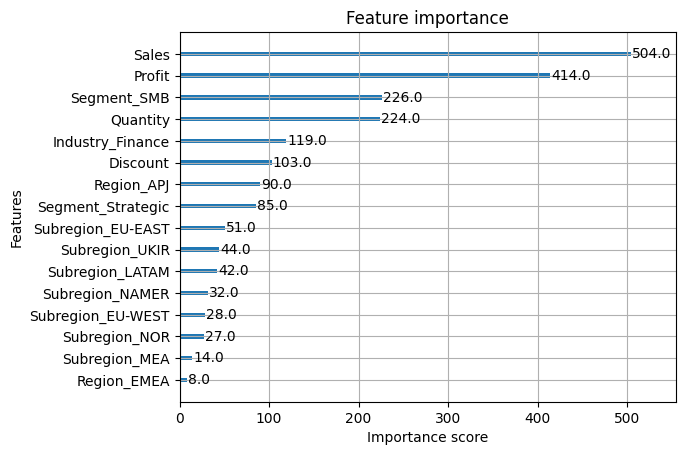

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_model)
plt.show()

In [ ]:
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

In [ ]:
threshold = 0.35
y_custom_pred = (y_prob_xgb >= threshold).astype(int)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_custom_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1995
           1       0.15      0.75      0.25         4

    accuracy                           0.99      1999
   macro avg       0.57      0.87      0.62      1999
weighted avg       1.00      0.99      0.99      1999



In [ ]:
X_for_prediction = X_model_features.drop('Customer ID', axis=1)

transaction_probabilities = xgb_model.predict_proba(X_for_prediction)[:,1]

customer_transaction_probs = X_model_features[['Customer ID']].copy()
customer_transaction_probs['Churn_Probability'] = transaction_probabilities

# Aggregate (e.g., mean) churn probabilities by Customer ID
avg_churn_probability = customer_transaction_probs.groupby('Customer ID')['Churn_Probability'].mean().reset_index()

# Merge these aggregated probabilities into customer_df
# 'customer_df' is assumed to be created correctly earlier in the notebook.
customer_df = customer_df.merge(avg_churn_probability, on='Customer ID', how='left')

# Calculate Revenue Risk
customer_df['Revenue_Risk'] = customer_df['Sales'] * customer_df['Churn_Probability']

In [ ]:
X

,Sales,Quantity,Discount,Profit,Region_APJ,Region_EMEA,Subregion_APAC,Subregion_EU,Subregion_EU-EAST,Subregion_EU-WEST,...,Industry_Energy,Industry_Finance,Industry_Healthcare,Industry_Manufacturing,Industry_Misc,Industry_Retail,Industry_Tech,Industry_Transportation,Segment_SMB,Segment_Strategic
0,261.9600,2,0.00,41.9136,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,731.9400,3,0.00,219.5820,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,14.6200,2,0.00,6.8714,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,957.5775,5,0.45,-383.0310,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,22.3680,2,0.20,2.5164,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,3,0.20,4.1028,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
9990,91.9600,2,0.00,15.6332,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
9991,258.5760,2,0.20,19.3932,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
9992,29.6000,4,0.00,13.3200,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
X.shape

(9994, 28)